# PXD016278

## Proteome Profiling in Cerebrospinal Fluid Reveals Novel Biomarkers of Alzheimer's Disease
[PRIDE link](https://www.ebi.ac.uk/pride/archive/projects/PXD016278)

[Article link](https://www.embopress.org/doi/full/10.15252/msb.20199356)

In [1]:
#Import libraries
os.chdir("/home/robbe/ionbot/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import numpy as np
import os
from pathlib import Path
from pyteomics import mass as pymass
import OxiAnalysis as OA
import importlib
importlib.reload(OA)
import warnings; warnings.simplefilter('ignore')

## Quantitative-based analysis

In [2]:
#quant = pd.read_csv("/home/robbe/ionbot/PXD016278/raw_files/QuantifiedPeptides.tsv", sep= "\t")
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD016278/flashlfq/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type')), axis = 1, inplace = True)
quant.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction01,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction02R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction03_R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction04_R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction05_R2,...,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction16,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction17,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction18,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction19,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction20,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction21,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction22,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction23,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction24,Unnamed: 101
0,AAAAAAAAAAAAAAAGAGAGAKnan,AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000,0.0,0.0,...,2.016063e+05,6.783181e+05,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,NaN
1,AAAAAAAAAKnan,AAAAAAAAAK,PHX2B_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,NaN
2,AAAAAAAAAVSRR12|[981]glucosone[R],AAAAAAAAAVSRR,NaN,NaN,NaN,3.159841e+06,263986.097656,0.000,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,NaN
3,AAAAAAAAGAFAGRR14|[1918]Carbonyl[R],AAAAAAAAGAFAGRR,NaN,NaN,NaN,0.000000e+00,0.000000,0.000,0.0,0.0,...,1.550330e+06,2.073836e+06,0.0,0.0,0.0,0.0,3.529714e+06,2.289962e+07,0.0,NaN
4,AAAAAAAAGAFAGRR15|[1918]Carbonyl[R],AAAAAAAAGAFAGRR,NaN,NaN,NaN,0.000000e+00,0.000000,6137970.625,8516465.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,NaN


In [3]:
cols = ['Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction01',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction02R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction03_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction04_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction05_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction06_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction07_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction08_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction09_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction10_R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction11_180630160426',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction12',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction13',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction14',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction15',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction16',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction17',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction18',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction19',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction20',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction21',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction22',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction23',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction24',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction01',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction02R2',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction03',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction04',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction05',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction06',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction07',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction08',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction09',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction10',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction11',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction12',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction13',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction14',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction15',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction16',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction17',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction18',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction19',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction20',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction21',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction22',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction23',
       'Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction24']

In [4]:
quant = OA.quantile_transform(quant, cols)

In [5]:
summedintensities = OA.summedintensities(quant)
summedintensities

,Modifications,Gene Names,Organism,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction01,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction02R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction03_R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction04_R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction05_R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction06_R2,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_AD2_fraction07_R2,...,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction17,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction18,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction19,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction20,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction21,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction22,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction23,Intensity_20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1R2_library_ctrl2_fraction24,Unnamed: 101,Oxmod?
0,[1384]Homocysteic_acid[M],0.0,0.0,16.203479,22.316362,16.608348,31.527430,14.574168,11.175211,25.947606,...,20.265793,10.832522,14.769053,18.629687,11.404469,15.440314,19.175445,17.845879,0.0,31
1,[1914]Met->AspSA[M],0.0,0.0,51.106669,46.939394,59.025344,60.853831,46.910591,66.813748,67.633260,...,78.044281,52.878909,68.222220,55.382499,60.309420,82.006785,93.644551,100.584148,0.0,89
2,[1915]Decarboxylation[D],0.0,0.0,9.580072,18.566988,46.643051,39.194294,17.507685,11.692321,40.282058,...,20.228822,29.304721,48.526612,58.850934,87.208022,72.934654,44.667559,32.726912,0.0,107
3,[1915]Decarboxylation[E],0.0,0.0,23.513522,42.183887,48.067333,44.369388,30.608907,69.004972,58.168418,...,59.138625,45.843386,50.534290,40.778590,52.269297,82.957007,84.364906,64.711323,0.0,131
4,[1916]Aspartylurea[H],0.0,0.0,23.129637,39.619638,46.196255,70.923238,60.424509,45.489839,28.290110,...,46.467793,48.035387,53.910231,74.367055,74.855208,85.918094,61.728723,55.405099,0.0,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,[743]4-ONE+Delta:H(-2)O(-1)[K],0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6
86,[860]G-H1[R],0.0,0.0,22.382987,17.248224,27.370300,30.839681,21.477551,18.997221,11.362732,...,36.340818,26.331218,22.704331,23.780296,31.555969,31.153397,43.758768,49.511687,0.0,40
87,[936]Chlorination[Y],0.0,0.0,0.000000,0.000000,16.811968,9.492772,6.952435,11.598629,4.395755,...,4.101480,4.638023,11.135367,18.664134,22.824764,18.750332,8.785168,5.748870,0.0,27
88,[937]dichlorination[Y],0.0,0.0,0.000000,0.000000,6.012636,4.299211,4.945935,4.890230,4.564299,...,0.000000,0.000000,0.000000,0.000000,11.783720,11.214732,4.714893,0.000000,0.0,15


## Differential modification analysis but specific

In [6]:
Controldf = summedintensities.filter(regex="Modifications|ctrl2")
ADdf = summedintensities.filter(regex="Modifications|AD2")

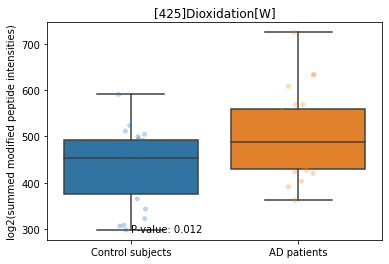

In [7]:
OA.boxplots(Controldf, ADdf, ["Control subjects", "AD patients"])

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
def boxplots(Control_df, Treatment_df, labels):
    pvallist = []
    for index, row in Control_df.iterrows():
        for index2, row2 in Treatment_df.iterrows():
            if index == index2:
                mod = row["Modifications"]
                dataControl = Control_df.iloc[index][1:]
                dataControl = dataControl.astype(float)
                dataControl = dataControl[dataControl != 0]
                dataTreatment = Treatment_df.iloc[index][1:]
                dataTreatment = dataTreatment.astype(float)
                dataTreatment = dataTreatment[dataTreatment !=0]
                data = [dataControl, dataTreatment] #TODO: #7 Probably better to put both these in a df together, then you can more easily use statannotations
                n_of_tests = Control_df.shape[0]
                
                if dataTreatment.size != 0 and dataControl.size != 0:
                    #One-sided Mann-Whitney U test
                    pval = stats.mannwhitneyu(dataControl,dataTreatment, alternative = 'less').pvalue
                    pvallist.append(pval) 
                    # if pval < 0.05: #TODO: #6 Multiple hypothesis testing correction needed?
                    #     formatted_pvalue = f'P-value = {pval:.2e}'
                    #     fig = plt.figure()
                    #     ax = sns.boxplot(data=data)
                    #     sns.stripplot(data=data, alpha = 0.3)
                    #     ax.set_xticks(range(2))
                    #     ax.set_xticklabels(labels)
                    #     plt.text(x = 0, y = min(min(dataControl), min(dataTreatment))-4, s="P-value: {:.3f}".format(pval))
                    #     plt.title(mod)
                    #     plt.ylabel("log2(summed modified peptide intensities)")
                    #     plt.show()
    corrected_pvals = multipletests(pvallist, method='fdr_bh')[1]
    return pvallist, corrected_pvals

In [9]:
pvallist, corrected_pvals = boxplots(Controldf, ADdf, ["Control subjects", "AD patients"])

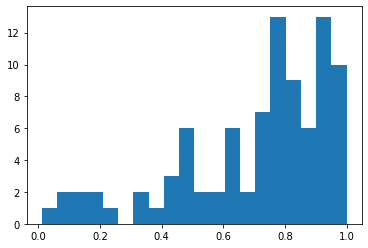

In [10]:
plt.hist(pvallist, bins=20)
plt.show()

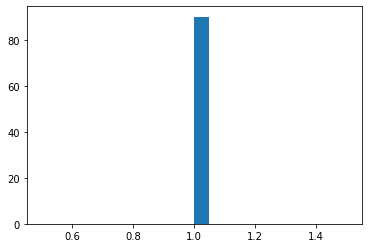

In [11]:
plt.hist(corrected_pvals, bins=20)
plt.show()

## Differential modification analysis but non-specific

In [12]:
summedintensities["UnimodAccession"] = summedintensities["Modifications"].apply(OA.get_unimod_acc)

In [13]:
test = summedintensities.groupby("UnimodAccession").sum().reset_index()

In [14]:
Controldf = test.filter(regex="UnimodAccession|ctrl2")
ADdf = test.filter(regex="UnimodAccession|AD2")

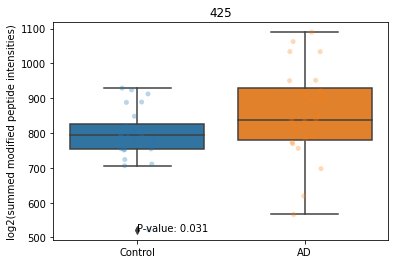

In [15]:
OA.boxplots_not_specific(Controldf, ADdf, ["Control", "AD"])

In [16]:
pvallist, corrected_pvals = OA.multipletest(Controldf, ADdf)

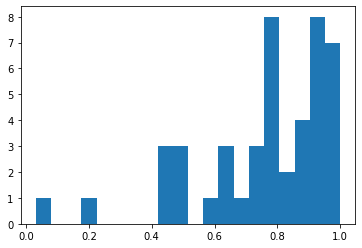

In [17]:
plt.hist(pvallist, bins = 20)
plt.show()

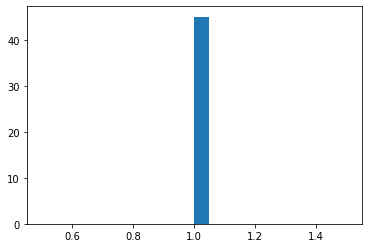

In [18]:
plt.hist(corrected_pvals, bins=20)
plt.show()

In [19]:
corrected_pvals

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Oxidation distribution on methionine and cysteine

In [20]:
Nonmodified = quant.loc[quant["Sequence"].str.endswith("nan") & quant["Base Sequence"].str.contains("M")]
Sulfoxide = quant.loc[quant["Sequence"].str.contains("[35]oxidation[M]",regex=False)]
Sulfone = quant.loc[quant["Sequence"].str.contains("[425]Dioxidation[M]", regex = False)]
Homocysteic_acid = quant.loc[quant["Sequence"].str.contains("[1384]Homocysteic_acid[M]", regex = False)]
Nonmodifiednums = Nonmodified.append(Nonmodified.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfoxidenums = Sulfoxide.append(Sulfoxide.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfonenums = Sulfone.append(Sulfone.sum(numeric_only=True), ignore_index=True)[-1:]
Homocysteicnums = Homocysteic_acid.append(Homocysteic_acid.sum(numeric_only=True), ignore_index= True)[-1:]
moddf = [Nonmodifiednums, Sulfoxidenums, Sulfonenums, Homocysteicnums]

In [21]:
Controldict = {}
ADdict = {}
for i, df in enumerate(moddf):
    df = df.filter(regex=r'fraction')
    Controlsub = df.loc[:, df.columns.str.contains("ctrl2")]
    ADsub = df.loc[:, df.columns.str.contains("AD2")]
    Controlsum = Controlsub.sum(axis=1)
    ADsum = ADsub.sum(axis=1)
    Controldict[i] = Controlsum.values[0]
    ADdict[i] = ADsum.values[0]

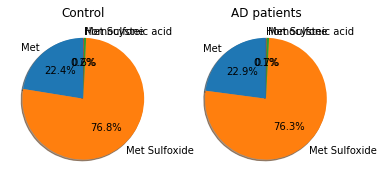

In [22]:
labels = ["Met", "Met Sulfoxide", "Met Sulfone", "Homocysteic acid"]
sizesC = []
sizesT = []
for x, y in Controldict.items():
    sizesC.append(y)
for x, y in ADdict.items():
    sizesT.append(y)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(sizesC, labels=labels, autopct='%1.1f%%', shadow= True, startangle = 90)
ax2.pie(sizesT, labels=labels, autopct='%1.1f%%', shadow= True, startangle= 90)
plt.title("Methionine containing peptides")
ax1.set_title("Control")
ax2.set_title("AD patients")
plt.show()

In [23]:
NonmodifiedC = quant.loc[quant["Sequence"].str.endswith("nan") & quant["Base Sequence"].str.contains("C")]
Sulfenic = quant.loc[quant["Sequence"].str.contains("[35]oxidation[C]",regex=False)]
Sulfinic = quant.loc[quant["Sequence"].str.contains("[425]Dioxidation[C]", regex = False)]
Cysteic = quant.loc[quant["Sequence"].str.contains("[345]Trioxidation[C]", regex = False)]
Non_modified = NonmodifiedC.append(NonmodifiedC.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfenic_acid = Sulfenic.append(Sulfenic.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfinic_acid = Sulfinic.append(Sulfinic.sum(numeric_only=True), ignore_index=True)[-1:]
Cysteic_acid = Cysteic.append(Cysteic.sum(numeric_only=True), ignore_index=True)[-1:]
moddfc = [Non_modified, Sulfenic_acid, Sulfinic_acid, Cysteic_acid]

In [24]:
Controldict = {}
ADdict = {}
for i in moddfc:
    name = OA.retrieve_name(i)[1]
    df = i.filter(regex=r'fraction')
    Controlsub = df.loc[:, df.columns.str.contains("ctrl2")]
    ADsub = df.loc[:, df.columns.str.contains("AD2")]
    Controlsum = Controlsub.sum(axis=1)
    ADsum = ADsub.sum(axis=1)
    Controldict[name] = Controlsum.values[0]
    ADdict[name] = ADsum.values[0]

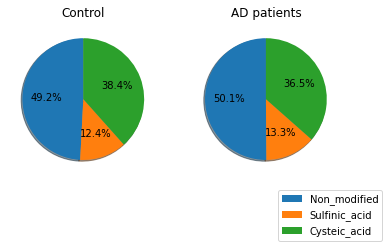

In [25]:
labelsC = []
labelsT = []
sizesC = []
sizesT = []

for x, y in Controldict.items():
    if y != 0:
        labelsC.append(x)
        sizesC.append(y)
for x, y in ADdict.items():
    if y != 0:
        labelsT.append(x)
        sizesT.append(y)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(sizesC, autopct='%1.1f%%', shadow= True, startangle = 90)
ax2.pie(sizesT, autopct='%1.1f%%', shadow= True, startangle= 90)
ax1.set_title("Control")
ax2.set_title("AD patients")
fig.legend(labelsC, loc="lower right")
plt.show()